# PART 3 : COMPLEXITY

## Step 0 : Imports

In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import time
import timeit

# import from exercise3 file
from random import shuffle

## Step 1 : Computing the upper bound

In this exercice, the goal is to compute the upper bound of the complexity of the given functions for this exercise, respectivly function_1() and function 2().

The assignement also tells us that it is better to have an to have a O(n^2) bound than a O(n^4) bound. In other words, it is better to have the smallest complexity possible, here O(n2).

let's  have a look at the solution for function1() : 

In [80]:
def function_1(n: int) -> None:
    temp_list = list()
    for i in range(n**2):
        temp = 0
        for j in range(i):
            temp += j
        temp_list.append(temp)
    sum(temp_list)

# Computing the upper bound for the time complexity
def compute_upper_bound(n):
    return n**4

# Example usage:
n = 5  # You can change this value to any positive integer
upper_bound = compute_upper_bound(n)
print(f"The upper bound for the time complexity is O(n^4) = {upper_bound}.")

The upper bound for the time complexity is O(n^4) = 625.


So here we have computed the complexity of function1() with an O(n^4) bound, but wait, the assignement wanted us to it with the smallest complexity.

However this is not possible with function1() as it is because it's complexity is dominated by the nested loops inside of it.

In other words the outer loop run n^2 times and the inner loop run i times.

so the total number of operations can be computed as 1 + 2 + 3 + ... + n^2 (the numbers being the incrementations of i).

This is a sum of the first n^2 integers, which can be simplified using the formula for the sum of an arithmetic series: n^2(n^2 + 1) / 2

Therefore the time complexity is O(n^4).

However, we could simplify the function in order to get an O(n^2) bound by getting rid of the inner loop.

In [81]:
def function_1(n: int) -> None:
    """
    Compute the time complexity of running
    this function as a function of n.
    """
    temp_list = list()
    temp = 0
    for i in range(n**2):
        temp += i
        temp_list.append(temp)
    sum(temp_list)

    # Computing the upper bound for the time complexity
def compute_upper_bound(n):
    return n**2

# Example usage:
n = 5  # You can change this value to any positive integer
upper_bound = compute_upper_bound(n)
print(f"The upper bound for the time complexity is O(n^2) = {upper_bound}.")

The upper bound for the time complexity is O(n^2) = 25.


Now we need to do this for function2()

In [82]:
def function_2(n: int) -> None:

    print(n)
    for i in range(n):
        temp_list = [j+i for j in range(n)]
        shuffle(temp_list)
        max(temp_list)

# Compute the upper bound for the time complexity
def compute_upper_bound(n):
    return n**2

# Example usage:
n = 5  # You can change this value to any positive integer
upper_bound = compute_upper_bound(n)
print(f"The upper bound for the time complexity is O(n^2) = {upper_bound}.")

The upper bound for the time complexity is O(n^2) = 25.


This function having no nested loop, we can directly compute it's complexity with an O(n^2) bound

## Step 2 : Verify the bound

In this second part, we need to verify if the bound on each functions is correct by fitting a polynomial of the found degree to a
curve representing the measured elapsed computation time as a function of n.
For instance in figure 3, the function as a O(n3 ) complexity, so a fitted polynomial of degree 2 can not represent well the curve.

for this, we will use the numpy library in order to help us.

In order to get the best results possible, we will use a polynomial fit of the 3rd degree.

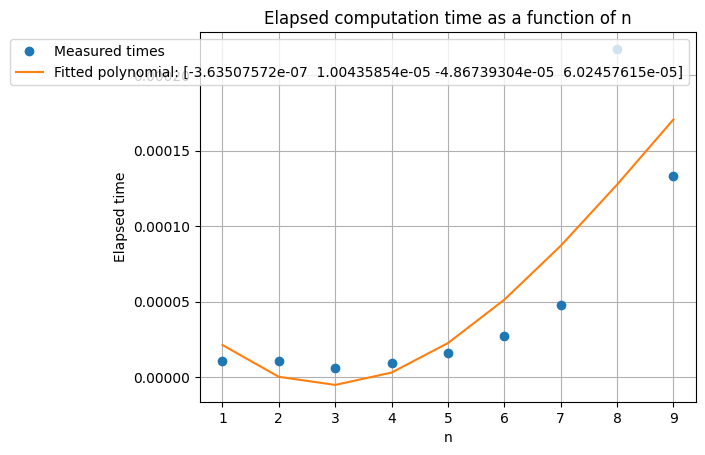

In [83]:
def function_1(n: int) -> None:
    temp_list = list()
    for i in range(n**2):
        temp = 0
        for j in range(i):
            temp += j
        temp_list.append(temp)
    sum(temp_list)

# Computing the upper bound for the time complexity
def compute_upper_bound(n):
    return n**4

# Measure the elapsed computation time for different values of n
n_values = np.arange(1, 10, 1)  # Change the range as needed
elapsed_times = []
for n in n_values:
    elapsed_time = timeit.timeit(lambda: function_1(n), number=1)
    elapsed_times.append(elapsed_time)

# Fitting a polynomial of degree 4 to the elapsed times
coefficients = np.polyfit(n_values, elapsed_times, 3)

# Plotting the measured elapsed computation time
plt.plot(n_values, elapsed_times, 'o', label='Measured times')
plt.xlabel('n')
plt.ylabel('Elapsed time')
plt.title('Elapsed computation time as a function of n')
plt.grid(True)

# Generating fitted values from the polynomial
fitted_values = np.polyval(coefficients, n_values)
plt.plot(n_values, fitted_values, '-', label=f'Fitted polynomial: {coefficients}')
plt.legend()
plt.show()

With the resulting curve, we can see that the polynomial follows the measured times (time complexity). We can conclude that the data points follows the fitted polynomial and therefore that indicates that the time complexity of function_1 is likely closer to a cubic function of n.

Overall, the bound we found for this function is correct.

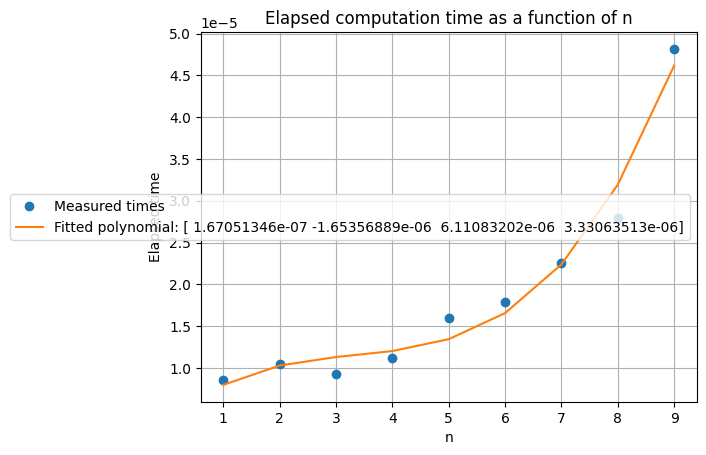

In [84]:
from random import shuffle
import numpy as np
import timeit
import matplotlib.pyplot as plt

def function_2(n: int) -> None:
    """
    Compute the time complexity of running
    this function as a function of n.

    Do not hesitate to do some research about the
    complexity of the functions used and to average
    the measured times over a number of trials if necessary.
    """
    #print(n) commented for less visual pollution.
    for i in range(n):
        temp_list = [j+i for j in range(n)]
        shuffle(temp_list)
        max(temp_list)

# Computing the upper bound for the time complexity
def compute_upper_bound(n):
    return n ** 2

# Measure the elapsed computation time for different values of n
n_values = np.arange(1, 10, 1)  # Change the range as needed
elapsed_times = []
for n in n_values:
    elapsed_time = timeit.timeit(lambda: function_2(n), number=1)
    elapsed_times.append(elapsed_time)

# Fitting a polynomial of degree 2 to the elapsed times using numpy.polyfit
coefficients = np.polyfit(n_values, elapsed_times, 3)

# Plotting the measured elapsed computation time and the fitted polynomial
plt.plot(n_values, elapsed_times, 'o', label='Measured times')
plt.xlabel('n')
plt.ylabel('Elapsed time')
plt.title('Elapsed computation time as a function of n')
plt.grid(True)

# Generating fitted values from the polynomial and plotting
fitted_values = np.polyval(coefficients, n_values)
plt.plot(n_values, fitted_values, '-', label=f'Fitted polynomial: {coefficients}')
plt.legend()
plt.show()

With this resulting curve, we can also conclude that the fitting polynomial shows us that the bound we found is correct.

## Conclusion

In conclusion, finding an upper bound of a given function allows us to know the maximum limit of ressources the function can compute.
However this bound can be incorrect. Thus we verify it by fitting a plynomial in order to compare the elapsed time and the evolution of the resulting curve.

In this exercice, all the bounds were found to be correct thanks to the fitting polynomial, therefore giving us clear insights of their capabilities.